In [ ]:
# The goal of the project is to predict whether the subject has 
# epileptic seizure or not based on the output from EEG. 
# This would be a classification project. 
# The data set is available at https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition. 
# Total number of records are 11,500 and number of attributes is 179

In [17]:
import pandas as pd
import urllib2 as url
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Load the Data from the website.
data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00388/data.csv",index_col=[0])
data.index.name="ID" # The first column does nto have a Header. It also happens to be the column we want to index

In [6]:
# Check Top 5 rows
data.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
ID,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
X15.V1.924,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [7]:
# Check the shape of the data
data.shape

(11500, 179)

In [8]:
#Name of the columns
data.columns

Index([u'X1', u'X2', u'X3', u'X4', u'X5', u'X6', u'X7', u'X8', u'X9', u'X10',
       ...
       u'X170', u'X171', u'X172', u'X173', u'X174', u'X175', u'X176', u'X177',
       u'X178', u'y'],
      dtype='object', length=179)

In [9]:
data.info()
# OBSERVATIONS based on the result
# All the attributes have data type of Integer.
# No missing values

<class 'pandas.core.frame.DataFrame'>
Index: 11500 entries, X21.V1.791 to X16.V1.210
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.8+ MB


In [10]:
data.describe()
# OBSERVATIONS based on the result
# The values of all the attributes have a negative value and go from a  min of -1700 to + 1800

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


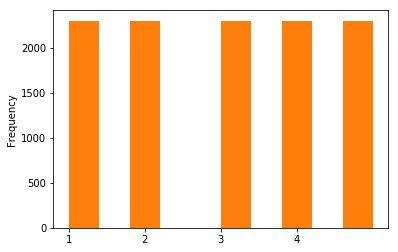

In [22]:
data["y"].plot(kind="hist")
plt.xlabel="Categories (1=Epliptec, 2,3,4,5=Others)"
plt.xticks(np.arange(1,5,1))
plt.show()
# OBSERVATIONS based on the result
# All classes are equally distributed.

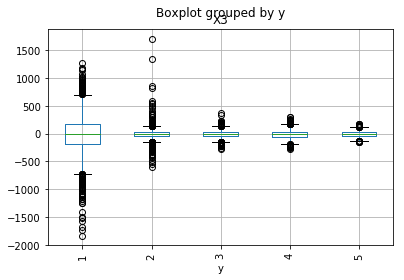

In [33]:
#Box Plot by each attirbute and Group by Y class
data.boxplot(column="X1",by="y",rot=90)
plt.show()
# OBSERVATIONS based on the result
# Observations belonging to Class 1 have high variance.

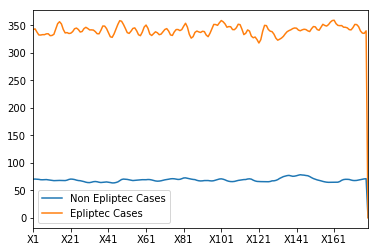

In [64]:
# Check if variance is high for all attributes for class =1
non_epi=data[data.y<>1].describe().loc["std"]
epi=data[data.y==1].describe().loc["std"]
non_epi.plot(label="Non Epliptec Cases",legend=True)
epi.plot(label="Epliptec Cases",legend=True)
plt.xlabel="Attributes"
plt.show()
# It can be clearly seen that Epliptec cases (Y=1) have a high variation across all attributes
# Should we continue ?